Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

<b>Суть проекта</b> — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы. Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам. 

In [667]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import warnings; warnings.simplefilter('ignore')

from itertools import combinations
from scipy.stats import ttest_ind

In [668]:
students = pd.read_csv('stud_math.xls')

In [669]:
#Проведем первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять 
#к столбцам определённого типа.

In [670]:
#Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:
display(students.head(10))
students.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,...,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [671]:
#В датасете 13 числовых столбцов
len(students.describe().columns)

13

In [672]:
students.describe().columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'studytime, granular', 'famrel', 'freetime', 'goout', 'health',
       'absences', 'score'],
      dtype='object')

In [673]:
# Посмотрим на их имена
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

Описание датасета
Посмотрим на переменные, которые содержит датасет:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

In [674]:
students.iloc[:,9:25]
#есть столбец, который не включили в описание - 'studytime, granular'  

,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel
0,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0
1,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0
2,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0
3,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0
4,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0
391,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0
392,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0
393,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0


In [675]:
#Для удобства использования переименуем столбцы:
students.rename(columns = {
                        'Pstatus':'pstatus', #parent's status
                        'Medu':'medu', #mother education
                        'Fedu':'fedu', #father education
                        'Mjob':'mjob', #mother job
                        'Fjob':'fjob', #father job
                        'studytime, granular':'studytime_granular', 
                         }, inplace = True)

<b>Рекомендации по выполнению проекта</b>
- Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
- Посмотрите на распределение признака для числовых переменных, устраните выбросы.
- Оцените количество уникальных значений для номинативных переменных.
- По необходимости преобразуйте данные
- Проведите корреляционный анализ количественных переменных
- Отберите не коррелирующие переменные.
- Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
- Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

In [676]:
students.describe()

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [677]:
#Напишем функции, которые можно применять к столбцам.

In [678]:
#Функция для анализа числовых столбцов
def func_(df, col, with_bins):
    
    #Заменим на NaN если есть пустая строчка     
    df[col] = df[col].apply(lambda x: None if str(x).strip()=='' else x)
    
    display(pd.DataFrame(df[col].value_counts()))
    print("Значений, встретившихся в столбце", col, "более 10 раз:", (df[col].value_counts()>10).sum())
    print("Уникальных значений:", df[col].nunique())
    df.loc[:, [col]].info()
    
    if with_bins == 1:
    
        fig = plt.figure()
        axes = fig.add_axes([0, 0, 1, 1])
        axes.hist(df[col], bins = int(df[col].median()),color = 'green') 
        #axes.set_title('Общая сумма счета')
        axes.set_ylabel('Количество')
        axes.set_xlabel(col)  
        
    else: # без bins равному медиане
        fig = plt.figure()
        axes = fig.add_axes([0, 0, 1, 1])
        axes.hist(df[col], color = 'green')        
        axes.set_ylabel('Количество')
        axes.set_xlabel(col)  

In [679]:
#Функция для анализа квантилей и выбросов
def func_quantile(df, col):   
    
    IQR = df[col].quantile(q=0.75) - df[col].quantile(0.25)
    perc25 = df[col].quantile(0.25)
    perc75 = df[col].quantile(0.75)
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
    
    # Подсчитаем количество выбросов
    print("Количество выбросов в столбце",col,":",df[df[col]<perc25 - 1.5*IQR][col].count() + df[df[col]>perc75 + 1.5*IQR][col].count())
    print("Выбросы в столбце",col,":",(df[df[col]<perc25 - 1.5*IQR][col]).to_list())
    print("Выбросы в столбце",col,":",(df[df[col]>perc75 + 1.5*IQR][col]).to_list())
    df[col].loc[df[col].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 20, label = 'IQR')
    plt.legend()       

In [680]:
#Функция для заполнения выбросов ближайшим квантилем
def filling_quantile(df, col, change_quant): #quant=0.25 или 0.75
    IQR = df[col].quantile(q=0.75) - df[col].quantile(0.25)
    perc25 = df[col].quantile(0.25)
    perc75 = df[col].quantile(0.75)
    high_border = perc75 + 1.5*IQR
    low_border = perc25 - 1.5*IQR
    if change_quant == 0.75:
        df[col] = df[col].apply(lambda x: high_border if x>high_border else x)
    elif change_quant == 0.25:
        df[col] = df[col].apply(lambda x: low_border if x<low_border else x)
    else:
        print('Значение квантиля должно быть 0.25 или 0.75 :)')

In [681]:
#Заполнение модой там где NaN
def filling_mode(df, col): 
    df[col].fillna(df[col].mode()[0],inplace=True)

In [682]:
#Строим график для колонок, содержащих номинативные переменные
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (8, 4))
    sns.boxplot(x=column, y='score', 
                data=students.loc[students.loc[:, column].isin(students.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [683]:
# Выведем для удобства еще раз все имеющиеся колонки
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

### Рассмотрим и проанализируем колонку age

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


Значений, встретившихся в столбце age более 10 раз: 5
Уникальных значений: 8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.1 KB


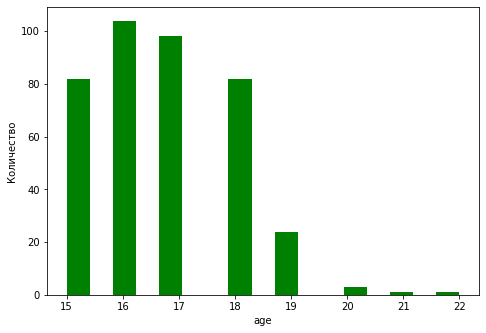

In [684]:
#age — возраст ученика (от 15 до 22)
for col in ['age']:
    func_(students, col,1)

Как мы видим, возраст в основном распределен между 16 и 18 (средний 16.7, 25-й перцентиль 16 и 75-й — 18)

<AxesSubplot:xlabel='age'>

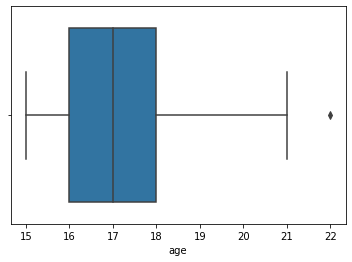

In [685]:
sns.boxplot(x= 'age', data = students)

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].
Количество выбросов в столбце age : 1
Выбросы в столбце age : []
Выбросы в столбце age : [22]


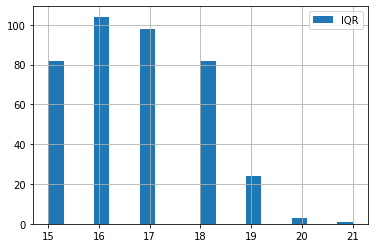

In [686]:
func_quantile(students, 'age')

In [687]:
#Функция корреляции использует функцию квадратного корня. Мы должны вручную изменить тип на float, а затем вычислить корреляцию.
students.loc[:,'age'].astype('float64').corr(students.loc[:,'score']).astype('float64')

-0.1557262607741257

In [688]:
# Заменим выброс (22) на ближайший квантиль Q3
filling_quantile(students, 'age',0.75)

In [689]:
#Проверка. Теперь максимум - 21 год.
students.age.max()

21.0

In [690]:
# Корреляция изменилась незначительно
students.loc[:,'age'].astype('float64').corr(students.loc[:,'score']).astype('float64')

-0.15585208343477236

***Вывод: Величина коэффициента корреляции отрицательна, и равна -0.16, то есть это слабая  отрицательная корреляция, и скорее всего мы не будем принимать ее в расчет.***

### Рассмотрим и проанализируем колонку medu

,medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


Значений, встретившихся в столбце medu более 10 раз: 4
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


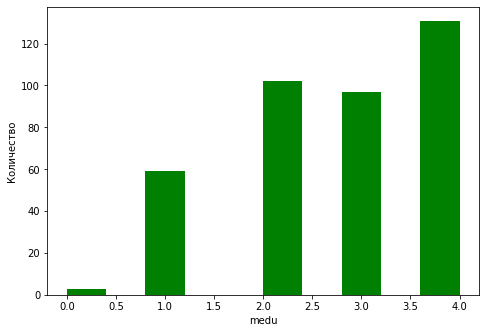

In [691]:
# образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
func_(students, 'medu',0)

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].
Количество выбросов в столбце medu : 0
Выбросы в столбце medu : []
Выбросы в столбце medu : []


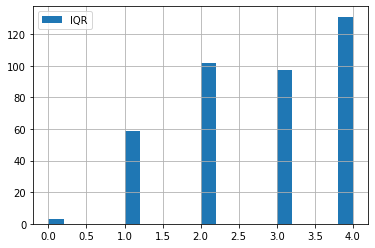

In [692]:
func_quantile(students, 'medu')

In [693]:
students.loc[:,'medu'].astype('float64').corr(students.loc[:,'score']).astype('float64')

0.2133487237506019

In [694]:
#Выбросов нет. Возможно объединить 0,1,2,3 в один пункт 3
students.medu = students.medu.apply(lambda x: 3 if (x == 0) or (x == 1) or (x == 2) else x)

,medu
3.0,261
4.0,131


Значений, встретившихся в столбце medu более 10 раз: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


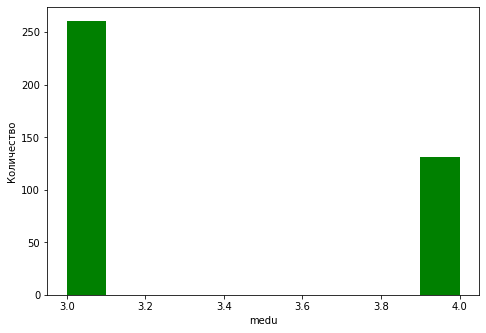

In [695]:
#Вот так гораздо симпатичнее и меньше катогерий. Либо есть высшее образование - 4 либо нет - 3 у мамы.
func_(students, 'medu',0)

In [696]:
students.loc[:,'medu'].astype('float64').corr(students.loc[:,'score']).astype('float64')

0.19984588947775148

In [697]:
#Заменим модой недостающие значения
filling_mode(students, 'medu')

#Посчитаем корреляцию
students.loc[:,'medu'].astype('float64').corr(students.loc[:,'score']).astype('float64')

0.2040486467786218

In [698]:
#Проверяем, что все 395 строк заполнены
students.loc[:, ['medu']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   medu    395 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


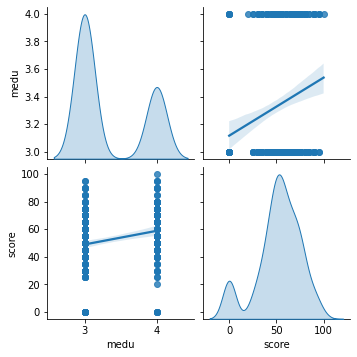

In [699]:
sns.pairplot(students, vars = ["medu","score"], kind = 'reg',diag_kind="kde")

In [700]:
students.medu = students.medu.apply(lambda x: "Нет высшего образования" if (x == 3) else "Есть высшее образование")

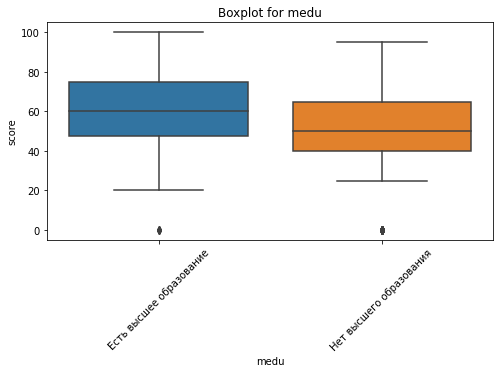

In [701]:
for col in ['medu']:
    get_boxplot(col)

In [702]:
#Для удобства закодируем столбец в 1 или 0
students.medu = students.medu.apply(lambda x: 1 if (x == "Есть высшее образование") else 0)

***Вывод: Величина коэффициента корреляции положительная, равна 0.2. Это слабая корреляция, но на графике мы видим линейную зависимость. Поэтому все же возьмем этот столбец в расчет.***

### Рассмотрим и проанализируем колонку fedu

,fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


Значений, встретившихся в столбце fedu более 10 раз: 4
Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


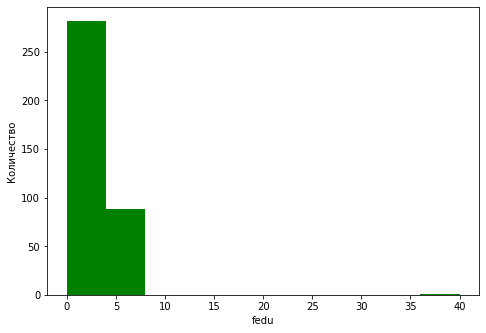

In [703]:
#образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
func_(students, 'fedu',0)

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].
Количество выбросов в столбце fedu : 3
Выбросы в столбце fedu : [0.0, 0.0]
Выбросы в столбце fedu : [40.0]


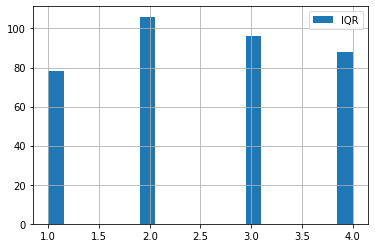

In [704]:
func_quantile(students, 'fedu')

In [705]:
students.loc[:,'fedu'].astype('float64').corr(students.loc[:,'score']).astype('float64')

0.07857258767789256

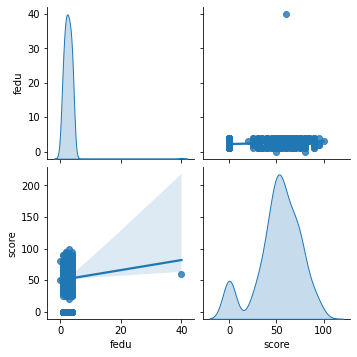

In [706]:
sns.pairplot(students, vars = ["fedu","score"], kind = 'reg',diag_kind="kde")

In [707]:
# Цифры 40 по факту скорее всего просто опечатки. 
#Заменим три цифры 40 на 4
students.loc[students['fedu'] == 40, 'fedu'] = 4

In [708]:
#Так же объединим 0,1,2,3 в один пункт 3
students.fedu = students.fedu.apply(lambda x: 3 if (x == 0) or (x == 1) or (x == 2) else x)

,fedu
3.0,282
4.0,89


Значений, встретившихся в столбце fedu более 10 раз: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


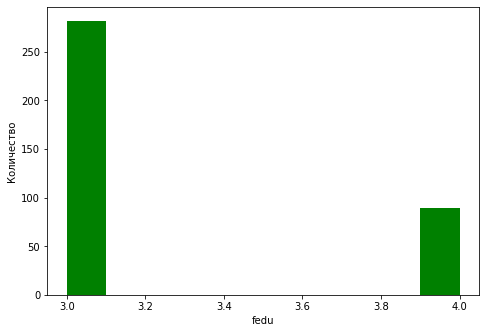

In [709]:
#Либо есть высшее образование -4 либо нет - 3 у папы.
#Видим, что осталось два варианта:
func_(students, 'fedu',0)

In [710]:
filling_mode(students, 'fedu')

In [711]:
students.loc[:,'fedu'].astype('float64').corr(students.loc[:,'score']).astype('float64')

0.08252625340250413

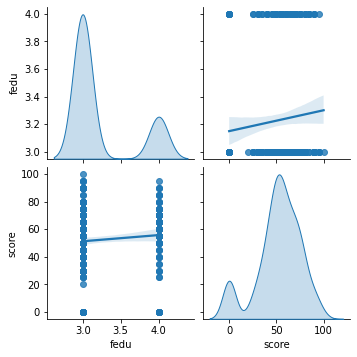

In [712]:
sns.pairplot(students, vars = ["fedu","score"], kind = 'reg',diag_kind="kde")

In [713]:
# Коэффициент корреляции немного подрос

***Вывод: Величина коэффициента корреляции положительная, равна 0.08, то есть это связь слабая или отсутствует. 
Не возьмем ее в расчет.***

### Рассмотрим и проанализируем колонку traveltime

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


Значений, встретившихся в столбце traveltime более 10 раз: 3
Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  367 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


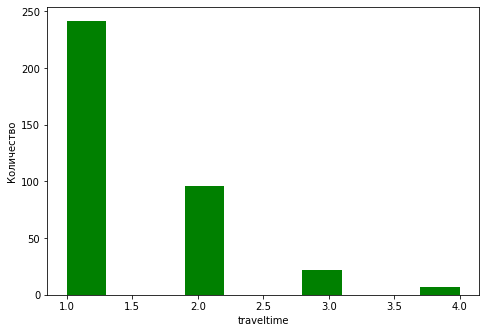

In [714]:
#traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
func_(students, 'traveltime',0)

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].
Количество выбросов в столбце traveltime : 7
Выбросы в столбце traveltime : []
Выбросы в столбце traveltime : [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]


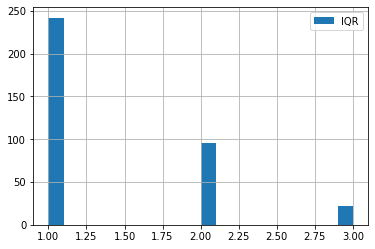

In [715]:
func_quantile(students, 'traveltime')

<AxesSubplot:>

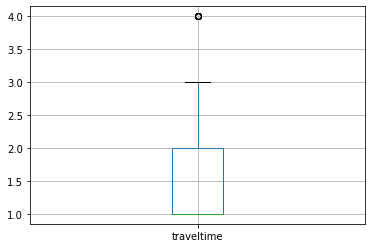

In [716]:
#Выбросы тут не являются выбросами, так как это просто обозначения, которые даны для определения времени, а не само время.
#Поэтому убирать их не будем
students.boxplot(column=['traveltime'])

In [717]:
students.loc[:,'traveltime'].astype('float64').corr(students.loc[:,'score']).astype('float64')

-0.07055876916148827

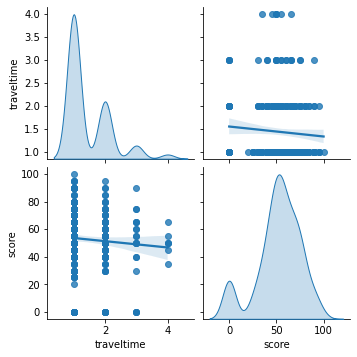

In [718]:
sns.pairplot(students, vars = ["traveltime","score"], kind = 'reg',diag_kind="kde")

In [719]:
#1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.
#объединим 0,1,2,3 в один пункт 3
students.traveltime = students.traveltime.apply(lambda x: 2 if (x == 1) else x)
students.traveltime = students.traveltime.apply(lambda x: 4 if (x == 3) else x)

In [720]:
filling_mode(students,'fedu')

In [721]:
students.loc[:,'traveltime'].astype('float64').corr(students.loc[:,'score']).astype('float64')

-0.06833271955057597

In [722]:
# коэффициент изменился незначительно

***Вывод: Величина коэффициента корреляции отрицательная, равна -0.06, то есть это связь слабая или отсутствует. 
Не возьмем ее в расчет.***

### Рассмотрим и проанализируем колонку studytime

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


Значений, встретившихся в столбце studytime более 10 раз: 4
Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  388 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


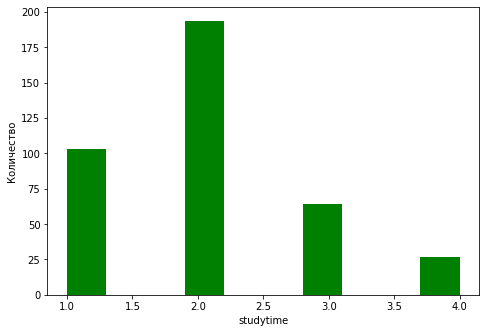

In [723]:
#studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
func_(students, 'studytime',0)

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


Значений, встретившихся в столбце studytime более 10 раз: 4
Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  388 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


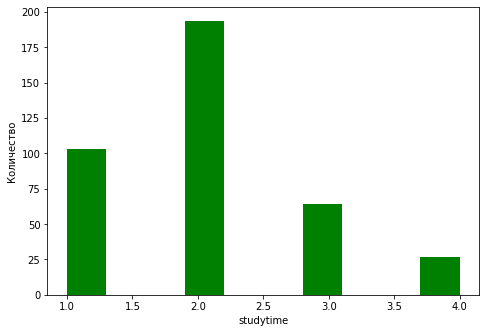

In [724]:
func_(students, 'studytime', 0)

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].
Количество выбросов в столбце studytime : 27
Выбросы в столбце studytime : []
Выбросы в столбце studytime : [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]


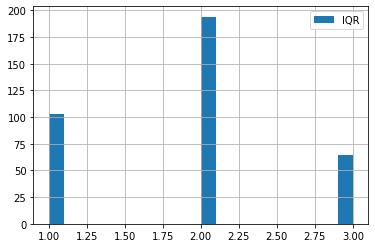

In [725]:
func_quantile(students, 'studytime')

In [726]:
# Выбросы здесь не являются выбросами так как это просто обозначения, которые даны для определения времени, а не само время.
# Заменять или удалять такие "выбросы" не будем.

In [727]:
students.loc[:,'studytime'].astype('float64').corr(students.loc[:,'score']).astype('float64')

0.11574134847030254

In [728]:
#1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов
students.studytime = students.studytime.apply(lambda x: 2 if (x == 1) else x)
students.studytime = students.studytime.apply(lambda x: 4 if (x == 3) else x)

In [729]:
students.loc[:,'studytime'].astype('float64').corr(students.loc[:,'score']).astype('float64')

0.12948330634180727

In [730]:
#Коэффициент корреляции вырос,но не значительно

***Вывод: Величина коэффициента корреляции положительная, равна 0.13, то есть это связь слабая или отсутствует. 
Не возьмем ее в расчет.***

### Рассмотрим и проанализируем колонку failures 

,failures
0.0,293
1.0,49
2.0,16
3.0,15


Значений, встретившихся в столбце failures более 10 раз: 4
Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  373 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


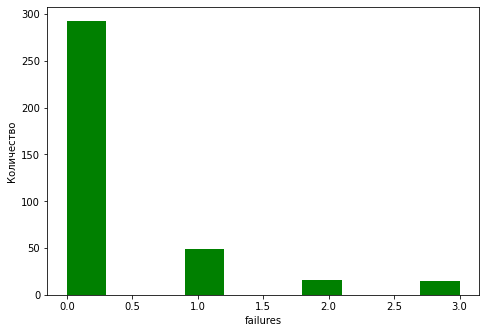

In [731]:
#failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
func_(students, 'failures', 0)

In [732]:
students.loc[:,'failures'].astype('float64').corr(students.loc[:,'score']).astype('float64')

-0.34433829998974297

In [733]:
#объединим 1,2,3 в один пункт 3
students.failures = students.failures.apply(lambda x: 1 if (x == 2) or (x == 3) else x)

In [734]:
students.loc[:,'failures'].astype('float64').corr(students.loc[:,'score']).astype('float64')

-0.346450468975624

In [735]:
# Теперь либо терпел неудачу, либо нет
students.failures.value_counts()

0.0    293
1.0     80
Name: failures, dtype: int64

In [736]:
#заполним модальными значениями недостающие строки
filling_mode(students,'failures')

In [737]:
#Проверяем, что все 395 строк заполнены
students.loc[:, ['failures']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  395 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


In [738]:
students.loc[:,'failures'].astype('float64').corr(students.loc[:,'score']).astype('float64')

-0.3394183287037261

In [739]:
# Коэффициент корреляции немного поменялся, но не значительно 

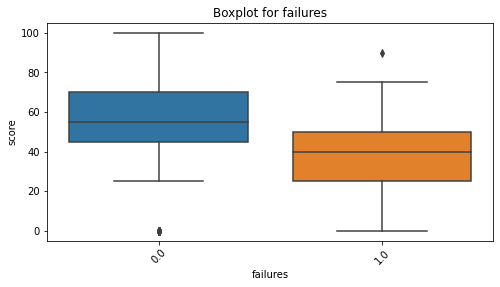

In [740]:
for col in ['failures']:
    get_boxplot(col)

In [741]:
#Выбросы тут не являются выбросами, которые нужно заменять.
#На  boxplot видно, что те, у кого количество внеучебных неудач равнялось нулю, получают более высокие баллы.

***Вывод: Величина коэффициента корреляции отрицательная, равна -0.34, то есть это связь умереная обратная. 
Можно взять ее в расчет.***

### Рассмотрим и проанализируем колонку studytime_granular 

,studytime_granular
-6.0,194
-3.0,103
-9.0,64
-12.0,27


Значений, встретившихся в столбце studytime_granular более 10 раз: 4
Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   studytime_granular  388 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


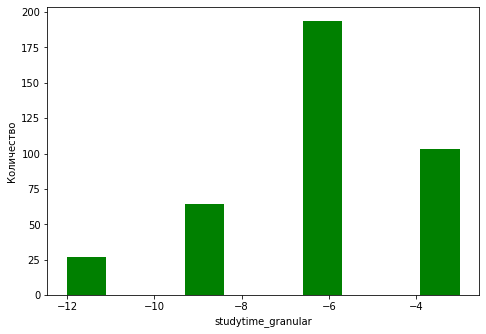

In [742]:
# Этой колонки не было в описании. Посмотрим что это такое.
func_(students, 'studytime_granular', 0)

25-й перцентиль: -6.0, 75-й перцентиль: -3.0, IQR: 3.0,  Границы выбросов: [-10.5, 1.5].
Количество выбросов в столбце studytime_granular : 27
Выбросы в столбце studytime_granular : [-12.0, -12.0, -12.0, -12.0, -12.0, -12.0, -12.0, -12.0, -12.0, -12.0, -12.0, -12.0, -12.0, -12.0, -12.0, -12.0, -12.0, -12.0, -12.0, -12.0, -12.0, -12.0, -12.0, -12.0, -12.0, -12.0, -12.0]
Выбросы в столбце studytime_granular : []


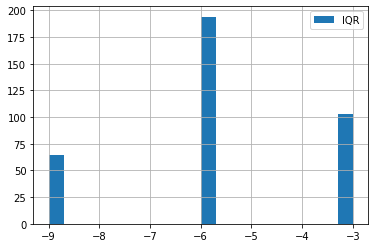

In [743]:
func_quantile(students, 'studytime_granular')

In [744]:
students.studytime_granular.value_counts()

-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime_granular, dtype: int64

In [745]:
students.loc[:,'studytime_granular'].astype('float64').corr(students.loc[:,'score']).astype('float64')

-0.11574134847030251

In [746]:
#Коэффициент корреляции очень мал

In [747]:
students.studytime_granular = students.studytime_granular.apply(lambda x: -6 if (x == -3) else x)
students.studytime_granular = students.studytime_granular.apply(lambda x: -9 if (x == -12) else x)
students.loc[:,'studytime_granular'].astype('float64').corr(students.loc[:,'score']).astype('float64')

-0.1294833063418074

***Вывод: Эта колонка повторяет колонку studytime, только в обратную сторону. Коэффициент корреляции тут -0.13, а в studytime =0.13 В расчет ее не берем*** 

### Рассмотрим и проанализируем колонку famrel

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


Значений, встретившихся в столбце famrel более 10 раз: 4
Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  368 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


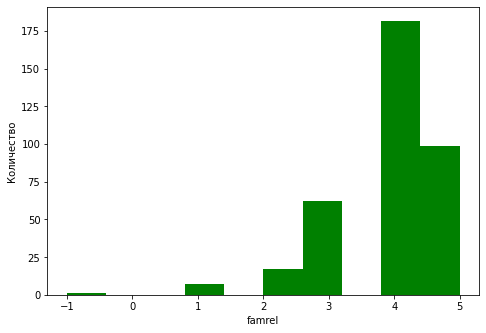

In [748]:
#famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
func_(students, 'famrel', 0)

In [749]:
#Заменим -1 на 1
students.loc[students['famrel'] == -1, 'famrel'] = 1

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,8


Значений, встретившихся в столбце famrel более 10 раз: 4
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  368 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


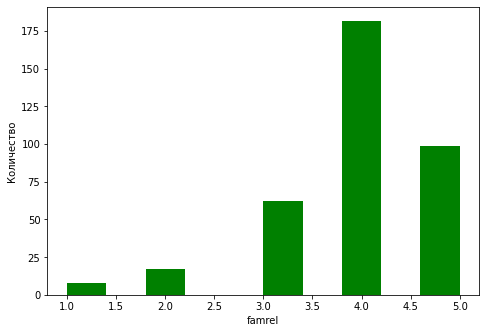

In [750]:
func_(students, 'famrel', 0)

In [751]:
# Видим, что -1 заменилась на единичку

In [752]:
students.loc[:,'famrel'].astype('float64').corr(students.loc[:,'score']).astype('float64')

0.05530462219018722

In [753]:
filling_mode(students,'famrel')

In [754]:
#Проверяем, что все 395 строк заполнены
students.loc[:, ['famrel']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  395 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


In [755]:
students.loc[:,'famrel'].astype('float64').corr(students.loc[:,'score']).astype('float64')

0.05290199611452856

***Вывод: Величина коэффициента корреляции равна -0.05. Это очень мало. В расчет колонку не берем.***

### Рассмотрим и проанализируем колонку freetime

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


Значений, встретившихся в столбце freetime более 10 раз: 5
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  384 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


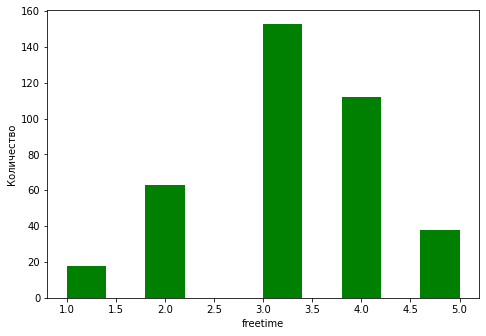

In [756]:
#freetime — свободное время после школы (от 1 - очень мало до 5 - очень много)
func_(students, 'freetime', 0)

In [757]:
students.loc[:,'freetime'].astype('float64').corr(students.loc[:,'score']).astype('float64')

0.019026114857179154

In [758]:
#Попробуем объединить уровни в два: 1-3 - мало; 4-5 - много
students.freetime = students.freetime.apply(lambda x: 1 if (x == 2) or (x == 3) else x)
students.freetime = students.freetime.apply(lambda x: 5 if (x == 4) else x)
students.freetime.value_counts()

1.0    234
5.0    150
Name: freetime, dtype: int64

In [759]:
students.loc[:,'freetime'].astype('float64').corr(students.loc[:,'score']).astype('float64')

0.05007398546356254

***Вывод: Величина коэффициента корреляции положительная, равна 0.05, то есть это связь слабая или отсутствует. 
Не возьмем ее в расчет.***

### Рассмотрим и проанализируем колонку goout

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


Значений, встретившихся в столбце goout более 10 раз: 5
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   387 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


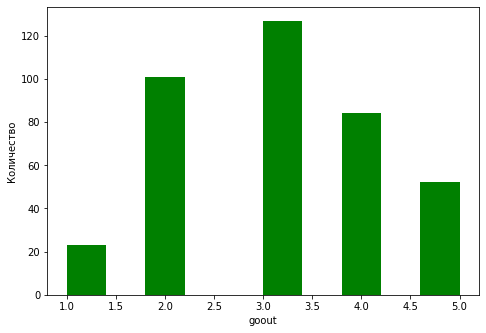

In [760]:
#goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
func_(students, 'goout', 0)

In [761]:
students.loc[:,'goout'].astype('float64').corr(students.loc[:,'score']).astype('float64')

-0.1296849276085435

In [762]:
students.goout = students.goout.apply(lambda x: "мало" if (x == 1) or (x == 2) or (x == 3) else x)
students.goout = students.goout.apply(lambda x: "много" if (x == 4) or (x == 5) else x)

In [763]:
students.goout.value_counts()

мало     251
много    136
Name: goout, dtype: int64

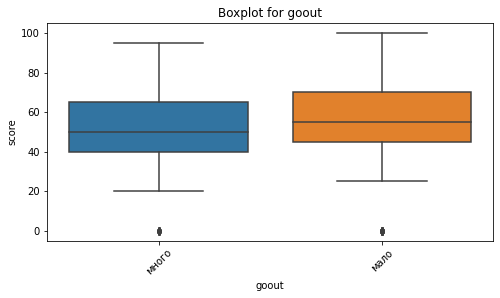

In [764]:
get_boxplot('goout')

In [765]:
students.loc[:, ['goout']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   goout   387 non-null    object
dtypes: object(1)
memory usage: 1.6+ KB


***Вывод:Перед преобразованием данных в столбец с типом "объект" коэффициент корреляции был отрицательный -0.13. Это очень мало чтобы взять этот столбец в расчет. Предпоолжение, что те, кто тратит меньше времени на проведение с друзьями, имеет более высокие быллы не оправдалось в должной мере.***

### Рассмотрим и проанализируем колонку health

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


Значений, встретившихся в столбце health более 10 раз: 5
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  380 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


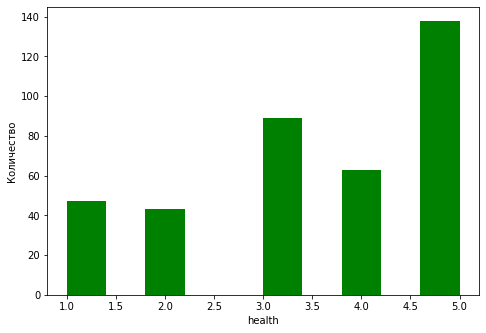

In [766]:
#health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
func_(students, 'health', 0)

In [767]:
filling_mode(students,'health')

In [768]:
students.loc[:,'health'].astype('float64').corr(students.loc[:,'score']).astype('float64')

-0.08058280706146814

***Вывод: Величина коэффициента корреляции отрицательная, равна - 0.08, то есть это связь слабая или отсутствует. 
Не возьмем ее в расчет.***

### Рассмотрим и проанализируем колонку absences

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


Значений, встретившихся в столбце absences более 10 раз: 8
Уникальных значений: 36
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  383 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


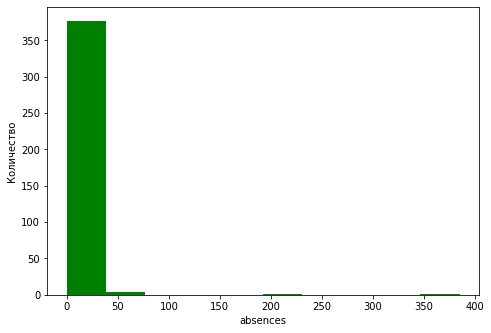

In [769]:
#absences — количество пропущенных занятий
func_(students, 'absences', 0)

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].
Количество выбросов в столбце absences : 17
Выбросы в столбце absences : []
Выбросы в столбце absences : [25.0, 54.0, 26.0, 56.0, 24.0, 28.0, 22.0, 385.0, 21.0, 75.0, 22.0, 30.0, 38.0, 22.0, 40.0, 23.0, 212.0]


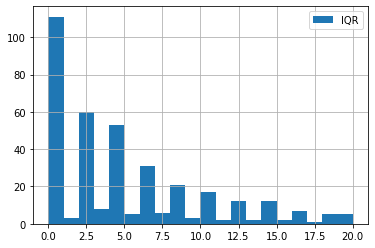

In [770]:
func_quantile(students, 'absences') 

In [771]:
students.loc[:,'absences'].astype('float64').corr(students.loc[:,'score']).astype('float64')

0.0652829844188877

In [772]:
#связь слабая

In [773]:
#Заменим выбросы на значения квантиля Q3
filling_quantile(students, 'absences', 0.75)

In [774]:
#Проверим корреляцию после замены
students.loc[:,'absences'].astype('float64').corr(students.loc[:,'score']).astype('float64')

0.07160253922539907

In [775]:
#Значение корреляции изменилось слабо.

In [776]:
#Максимальный балл при отсутствии пропусков
students[students['absences'] == 0]['score'].max()

95.0

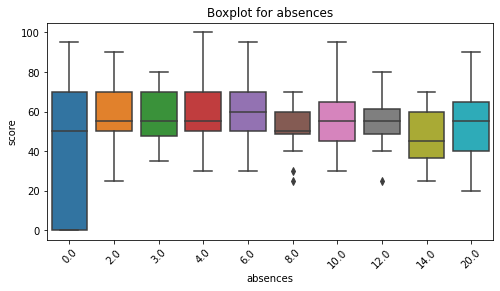

In [777]:
get_boxplot('absences')

***Вывод: Максимальный уровень score даже полностью не пропуская занятия не выше 95, а это, практически, уровень и при пропусках. Не берем в расчет***

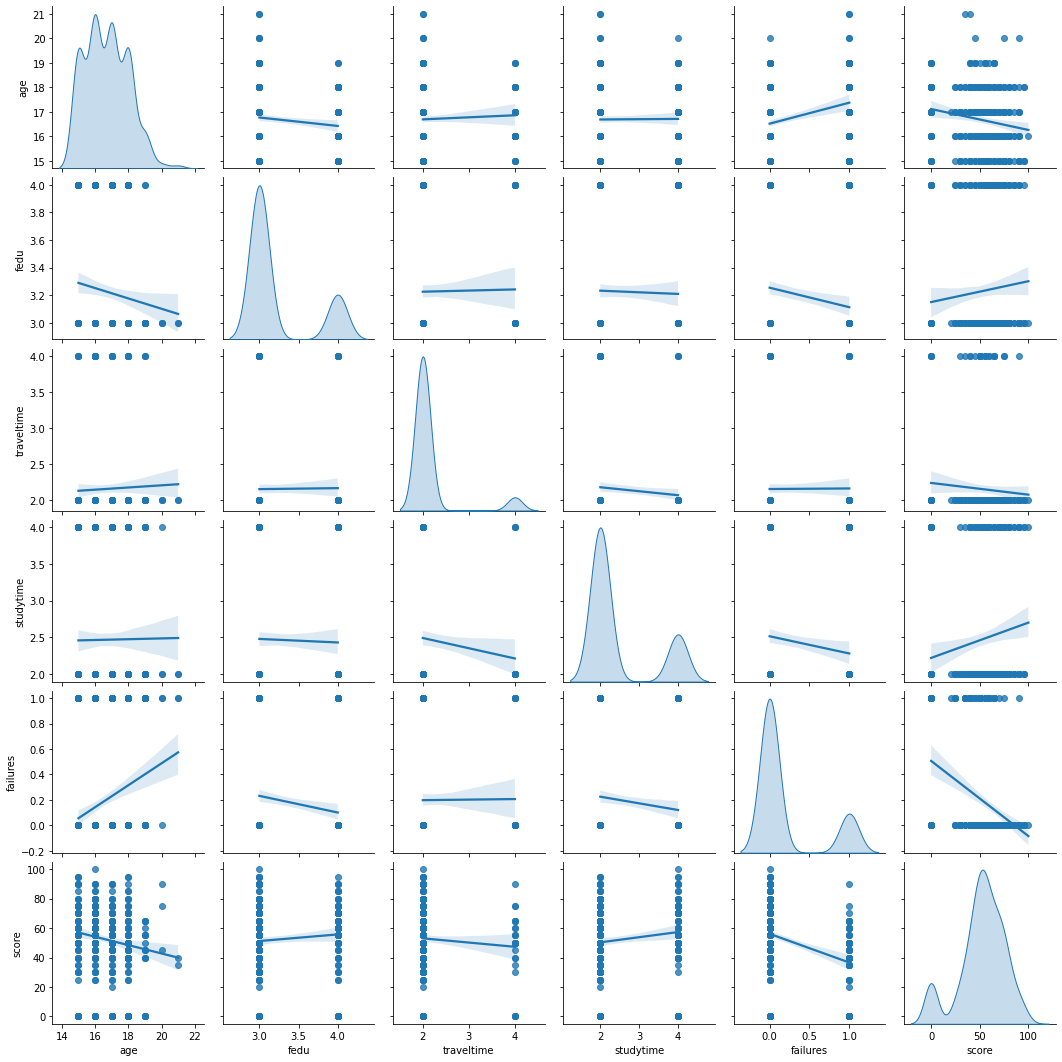

In [778]:
#Какие переменные имеют более выраженную линейную зависимость, какие - менее.
sns.pairplot(students, vars = ["age","fedu","traveltime","studytime","failures","score"], kind = 'reg',diag_kind="kde")

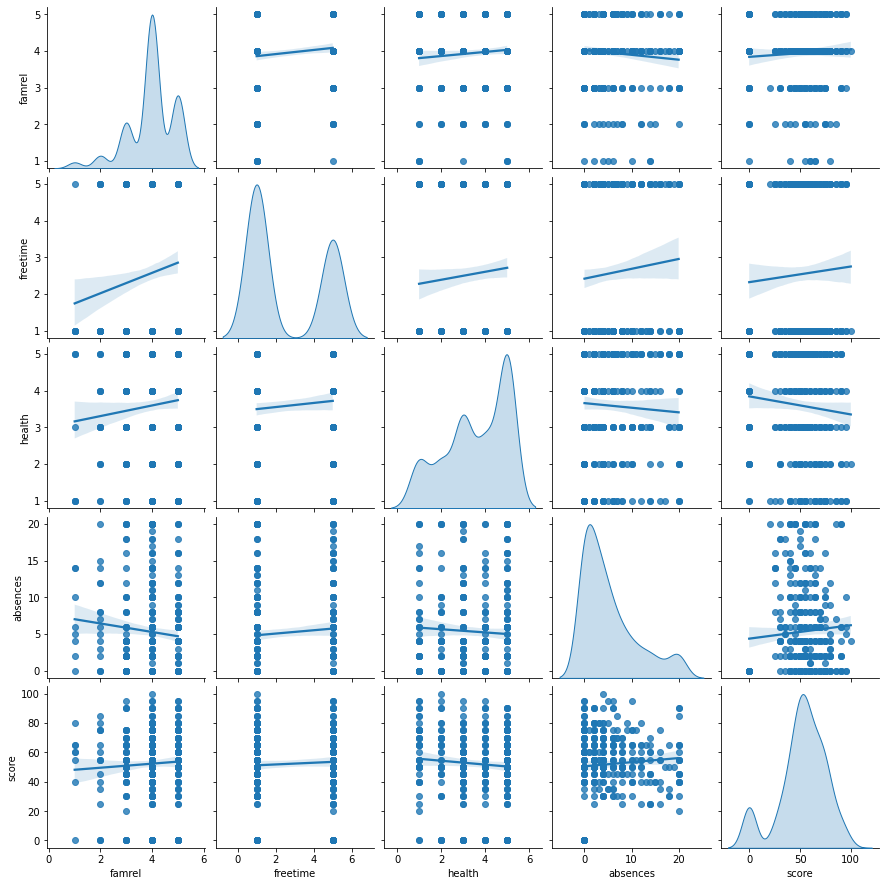

In [779]:
sns.pairplot(students, vars = ["famrel","freetime","health","absences","score"], kind = 'reg', diag_kind="kde")

In [780]:
students_corr = students.corr()
students_corr

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,health,absences,score
age,1.000000,-0.148248,-0.113718,0.035496,0.008048,0.271462,-0.008048,0.063326,0.057869,-0.057255,0.187363,-0.155852
medu,-0.148248,1.000000,0.430958,-0.120934,0.035441,-0.221195,-0.035441,-0.068104,0.049812,-0.061408,0.026983,0.204049
fedu,-0.113718,0.430958,1.000000,0.010658,-0.023810,-0.136083,0.023810,-0.057502,0.028264,0.068266,0.000953,0.082526
traveltime,0.035496,-0.120934,0.010658,1.000000,-0.087695,0.005860,0.087695,0.005882,-0.011791,0.011432,-0.022328,-0.068333
studytime,0.008048,0.035441,-0.023810,-0.087695,1.000000,-0.110703,-1.000000,0.070904,-0.071768,0.010992,-0.114534,0.129483
failures,0.271462,-0.221195,-0.136083,0.005860,-0.110703,1.000000,0.110703,-0.019859,0.120695,0.103847,0.173074,-0.339418
studytime_granular,-0.008048,-0.035441,0.023810,0.087695,-1.000000,0.110703,1.000000,-0.070904,0.071768,-0.010992,0.114534,-0.129483
famrel,0.063326,-0.068104,-0.057502,0.005882,0.070904,-0.019859,-0.070904,1.000000,0.125043,0.090195,-0.087500,0.052902
freetime,0.057869,0.049812,0.028264,-0.011791,-0.071768,0.120695,0.071768,0.125043,1.000000,0.078226,0.078074,0.050074
health,-0.057255,-0.061408,0.068266,0.011432,0.010992,0.103847,-0.010992,0.090195,0.078226,1.000000,-0.052257,-0.080583


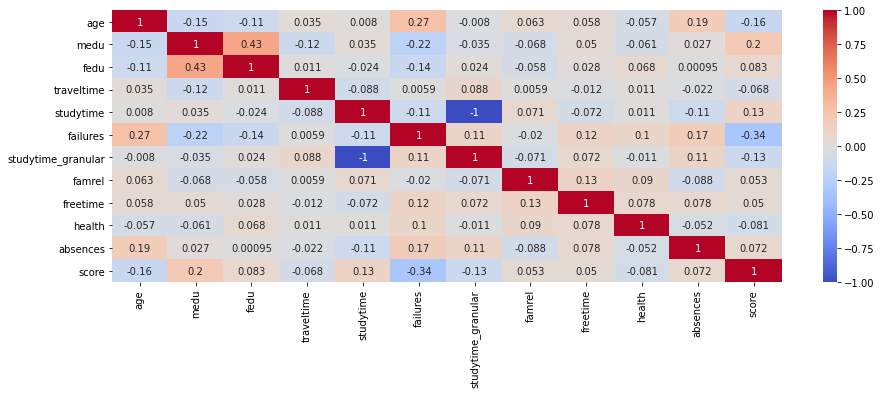

In [781]:
#Посмотрим на тепловую карту
plt.figure(figsize=(15, 5))
sns.heatmap(students_corr, cmap = 'coolwarm', annot=True)
plt.show()

***Вывод: Большинство колонок получились со значением коэффициента корреляции не более 0,2. Подобный результат говорит о слабой связи. Только колонка failures имеет корреляцию -0.34. Ее возьмем в расчет. Колонка medu с корреляцией 0.2 тоже возьмем в расчет. Это слабая корреляция, но на графике мы видили линейную зависимость.*** 

* * * * *

### Анализ номинативных переменных

Очевидно, что для номинативных переменных использовать корреляционный анализ не получится. Однако можно посмотреть, различаются ли распределения рейтинга в зависимости от значения этих переменных.

Номинативные переменные, которые осталось рассмотреть: school, sex, address, famsize, pstatus, mjob, fjob, reason,
            guardian, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic.

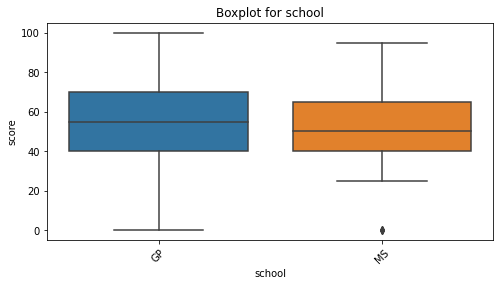

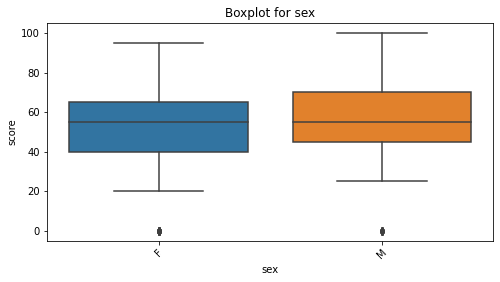

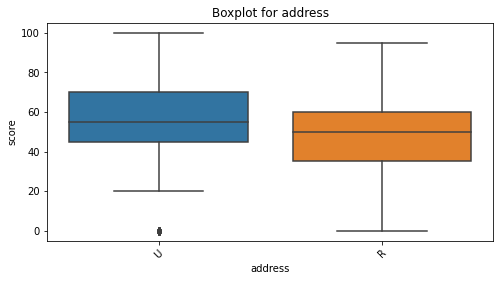

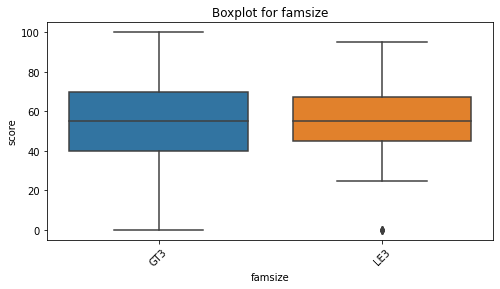

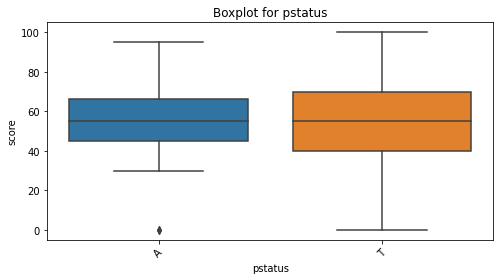

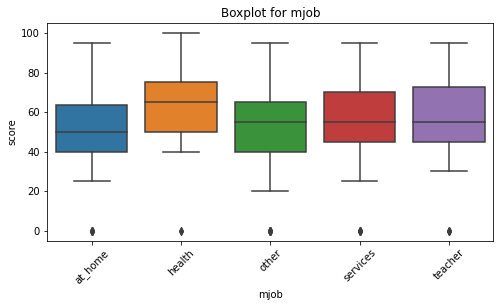

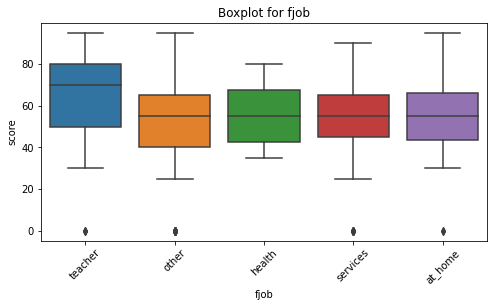

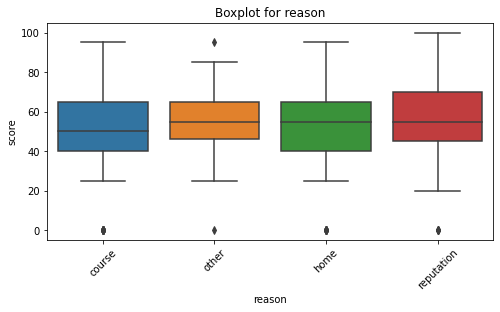

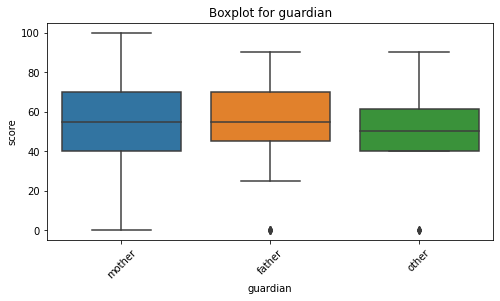

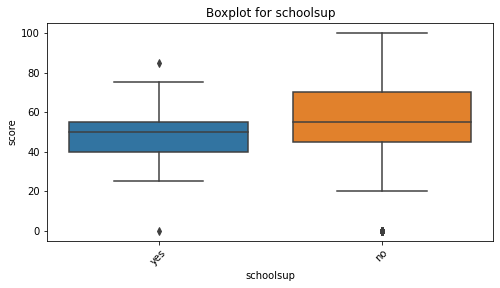

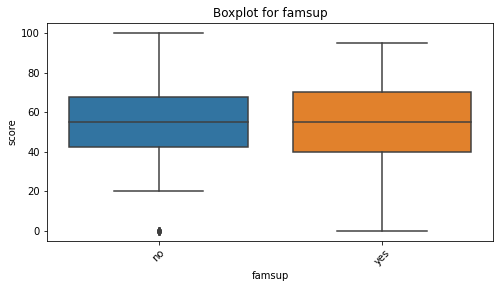

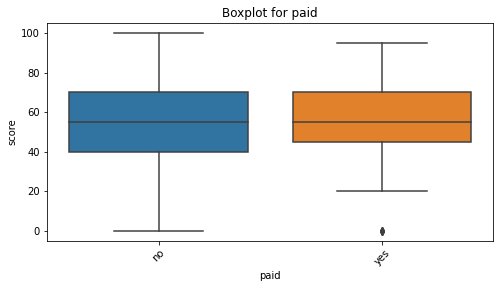

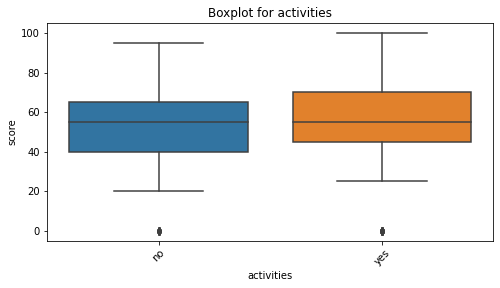

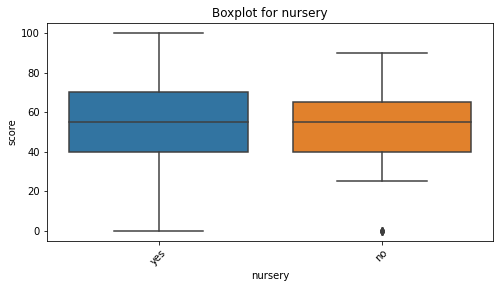

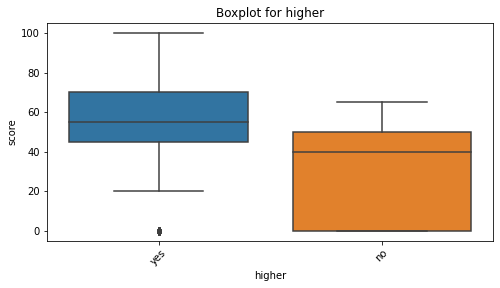

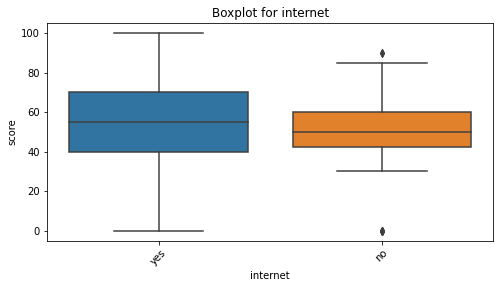

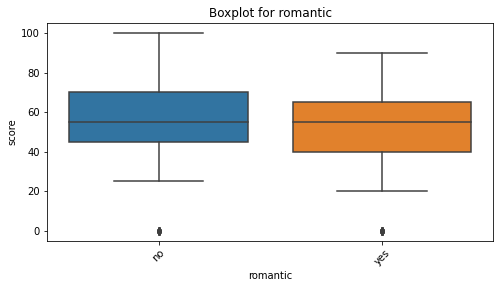

In [782]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus','mjob','fjob','reason',
            'guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']:
    get_boxplot(col)

По графикам похоже, что есть параметры, которые могут влиять на оценку. Однако графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь распознать статистика. Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента.

In [783]:
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'], 
                        students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [784]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus','mjob','fjob','reason',
            'guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки mjob


In [785]:
#Посмотрим на данные о колонке, у которой найдены статистически значимые различия  
students.loc[:, ['mjob']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mjob    376 non-null    object
dtypes: object(1)
memory usage: 1.6+ KB


In [786]:
#Заполним пропуски наиболее часто встречающимся значением
filling_mode(students,'mjob')

In [787]:
students.loc[:, ['mjob']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mjob    395 non-null    object
dtypes: object(1)
memory usage: 1.6+ KB


In [788]:
students.mjob.value_counts()

other       152
services     98
at_home      58
teacher      55
health       32
Name: mjob, dtype: int64

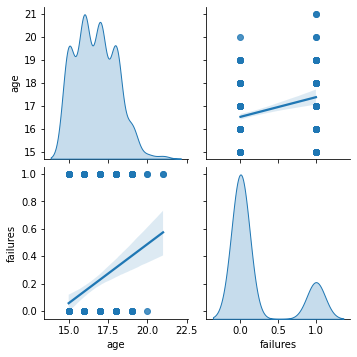

In [789]:
sns.pairplot(students, vars = ["age","failures"], kind = 'reg',diag_kind="kde")

U    295
R     83
Name: address, dtype: int64


<AxesSubplot:xlabel='address', ylabel='count'>

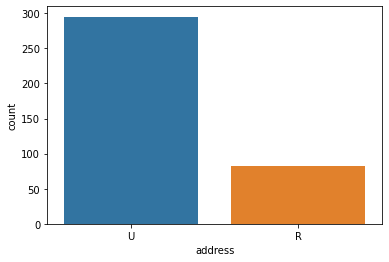

In [790]:
# Рассмотрим еще колонку: 
# address — тип адреса ученика ('U' - городской, 'R' - за городом)
print(students.address.value_counts())
sns.countplot(x= 'address', data = students)
# Большинсво проживает в городе и судя по графику boxplot результаты тех, кто живет в городе выше.

***Вывод: Оставим колонку mjob в датасете для дальнейшего построения модели. Колонку fjob тоже оставим. На boxplot видно, что второй квантиль (при условии, что отец работает учителем) достаточно выше, чем при остальных видах работ.
Данные из колонок schoolsup, higher и address тоже оказывают влияние на результаты***

***Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: medu, failures, mjob, fjob, schoolsup, address.***

In [791]:
students_final = students.loc[:, ['medu', 'failures', 'mjob','fjob','schoolsup','higher','address']]
students_final.head(10)

,medu,failures,mjob,fjob,schoolsup,higher,address
0,1,0.0,at_home,teacher,yes,yes,U
1,0,0.0,at_home,other,no,yes,U
2,0,1.0,at_home,other,yes,yes,U
3,1,0.0,health,NaN,no,yes,U
4,0,0.0,other,other,no,yes,U
5,1,0.0,services,other,no,yes,U
6,0,0.0,other,other,no,yes,NaN
7,1,0.0,other,teacher,yes,yes,U
8,0,0.0,services,other,no,yes,U
9,0,0.0,other,other,no,yes,U


In [792]:
# Заполним отстутствующие значения модой
for col in ['mjob','fjob','schoolsup','higher','address']:
    filling_mode(students_final, col)
students_final.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   medu       395 non-null    int64  
 1   failures   395 non-null    float64
 2   mjob       395 non-null    object 
 3   fjob       395 non-null    object 
 4   schoolsup  395 non-null    object 
 5   higher     395 non-null    object 
 6   address    395 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 13.9+ KB


In [793]:
students_final.head(10)

,medu,failures,mjob,fjob,schoolsup,higher,address
0,1,0.0,at_home,teacher,yes,yes,U
1,0,0.0,at_home,other,no,yes,U
2,0,1.0,at_home,other,yes,yes,U
3,1,0.0,health,other,no,yes,U
4,0,0.0,other,other,no,yes,U
5,1,0.0,services,other,no,yes,U
6,0,0.0,other,other,no,yes,U
7,1,0.0,other,teacher,yes,yes,U
8,0,0.0,services,other,no,yes,U
9,0,0.0,other,other,no,yes,U


#### Итак, в результате EDA для анализа влияния условий жизни учащихся на результаты госэкзамена по математике были получены следующие выводы:

- В данных достаточно мало пустых значений. Из 395 строчек минимально был заполнен Pstatus (на 350 строк), но он не входит в наш финальный датасет для построения модели.


- Выбросов немного. Часть из них, по сути, не являлись выбросами, так как это были просто обозначения, которые даны для определения какого-либо параметра. Это позволяет сделать вывод о том, что данные достаточно чистые.


- Положительная корреляция параметра age и failures может говорить о том, что чем старше человек, сдающий экзамен, тем больше количество внеучебных неудач у него может быть, что вполне логично.


- Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это medu, failures, mjob, fjob, schoolsup, higher и address.